In [3]:
import numpy as np
samp_v=np.loadtxt("/home/lz/work/pulsar_kick_velocity/v3d_mc_samples_noback.txt")

In [ ]:
import numpy as np

# --- 参数 ---
N_SAMP = 1000             # 每个源的样本数
V_MAX_CAP = 10000.0       # 速度上限 (km/s)

# 假设 samp_v 已经加载，我们获取总样本数
TOTAL_SAMPLES = len(samp_v)
N_STARS = int(TOTAL_SAMPLES / N_SAMP)
rng = np.random.default_rng(12345)

# 最终存储被接受的 V_3D 样本的数组
V_3D_accepted = np.zeros(TOTAL_SAMPLES)
k = 0 # V_3D_accepted 数组的计数器

print(f"--- 启动拒绝采样，目标 V_3D < {V_MAX_CAP:.0f} km/s ---")

# 外层循环：遍历每个源 (465 个)
for i in range(N_STARS):
    # 提取当前源的 1000 个固定的 v_trans 样本
    v_trans_samples = samp_v[i * N_SAMP : (i + 1) * N_SAMP]
    # 内层循环：遍历当前源的 1000 个固定 v_trans 样本
    for j in range(N_SAMP):
        v_trans_j = v_trans_samples[j] # 当前固定的 v_trans 值
        
        # 拒绝采样循环：持续生成角度，直到满足 V_MAX_CAP
        while True:
            # 1. 随机采样一个新的 cos(theta) (实现各向同性)
            cos_theta = rng.uniform(-1.0, 1.0)
            
            # 2. 计算 sin(theta)
            sin_theta = np.sqrt(1.0 - cos_theta**2)
            
            # 3. 计算试探 V_3D 值 (添加极小值保护，防止 sin_theta 严格为 0)
            sin_theta = np.maximum(sin_theta, 1e-10) 
            V_3D_trial = v_trans_j / sin_theta
            
            # 4. 验收条件
            if V_3D_trial < V_MAX_CAP:
                # 样本被接受，存储结果，并退出 while 循环
                V_3D_accepted[k] = V_3D_trial
                k += 1
                break
            # 否则 (V_3D_trial >= V_MAX_CAP)，继续 while 循环，重新采样 cos(theta)
    
    # 可选：打印进度
    if (i + 1) % 100 == 0:
        print(f"  已处理 {i + 1}/{N_STARS} 个源...")

print("\n拒绝采样完成。")
print(f"最终生成的 V_3D 最大值: {np.max(V_3D_accepted):.2f} km/s")

# 最终使用的数组是 V_3D_accepted

--- 启动拒绝采样，目标 V_3D < 10000 km/s ---

拒绝采样完成。
最终生成的 V_3D 最大值: 9942.80 km/s


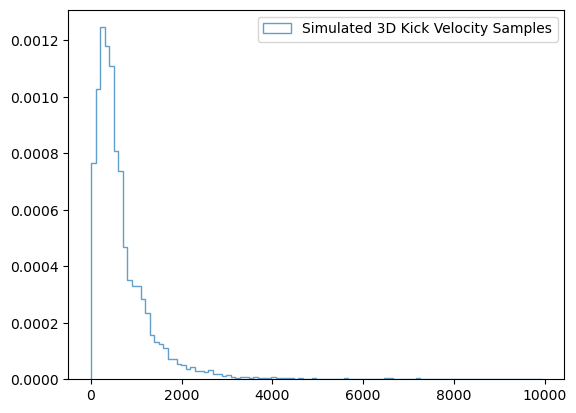

In [8]:
import matplotlib.pyplot as plt
plt.hist(V_3D_accepted,bins=100,density=True,alpha=0.7,histtype='step',label='Simulated 3D Kick Velocity Samples')
plt.legend()
#plt.xlim(0,1000)

In [9]:
np.savetxt('samp_v_noback.txt',V_3D_accepted)


In [10]:
samp_v_new=np.loadtxt('samp_v_noback.txt')

In [12]:
import numpy as np
from scipy.special import erf
from scipy.stats import beta as beta_dist
from scipy.stats import truncnorm
from scipy.interpolate import interp1d
import bilby
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.prior import LogUniform
from bilby.hyper.likelihood import HyperparameterLikelihood
from scipy import interpolate
from scipy import integrate
import random
import argparse
import os
import glob
import warnings
warnings.filterwarnings("ignore")
#####################
samples_new=samp_v_new
outdir='hy_outdir'
data_exp=samples_new
import sys
#import utilizes
n_samples=1000
npool=300
NN=int(len(data_exp)/n_samples)
nlive=2000
mx=n_samples
#################################
data_df=list()
ns_m=abs(data_exp)
for i in range(NN):
    re=pd.DataFrame(ns_m[i*mx:(i+1)*mx],columns=['mu'])
    data_df.append(re)
samples = data_df

def run_prior(dataset):
    return 1



In [13]:
print(min(samples_new),max(samples_new))

0.16944630551194895 9942.80391581161


19:10 bilby INFO    : Running for label 'u_hype_15756', output will be saved to 'hy_outdir'
19:10 bilby INFO    : Analysis priors:
19:10 bilby INFO    : k=LogUniform(minimum=0.01, maximum=10, name='k', latex_label='$k$', unit=None, boundary=None)
19:10 bilby INFO    : theta=Uniform(minimum=1, maximum=500, name='theta', latex_label='$\\theta$(km/s)', unit=None, boundary=None)
19:10 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
19:10 bilby INFO    : Analysis likelihood noise evidence: 0
19:10 bilby INFO    : Single likelihood evaluation took 3.218e-04 s
19:10 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bo

1it [00:00, ?it/s]

19:10 bilby INFO    : Written checkpoint file hy_outdir/u_hype_15756_resume.pickle
19:10 bilby INFO    : Starting to close worker pool.
19:10 bilby INFO    : Finished closing worker pool.
19:10 bilby INFO    : Rejection sampling nested samples to obtain 5915 posterior samples
19:10 bilby INFO    : Sampling time: 0:00:18.102849
19:10 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


19:10 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:10 bilby INFO    : Summary of results:
nsamples: 5915
ln_noise_evidence:  0.000
ln_evidence: -131.086 +/-  0.047
ln_bayes_factor: -131.086 +/-  0.047



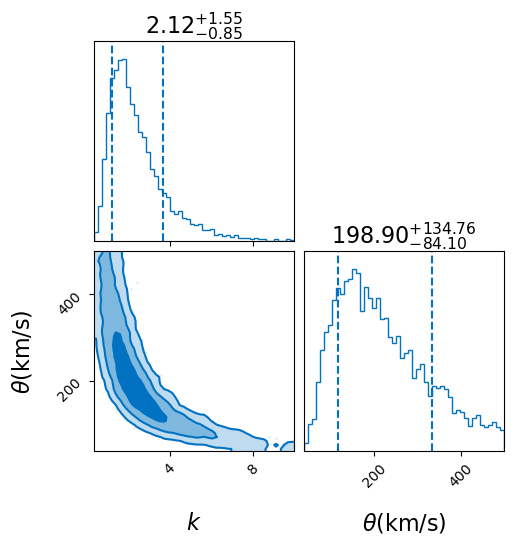

In [14]:
from scipy.special import beta
from scipy.special import gamma
def hyper_prior_gamma(dataset, k,theta):
    return (1 / (gamma(k)*theta**k)) * dataset['mu']**(k-1) *np.exp(-dataset['mu']/theta)

hp_priors_gamma = dict(k=LogUniform(0.01,10, 'k',r'$k$'),
                theta=Uniform(1, 500, 'theta',r'$\theta$(km/s)') )

hyper_prior_gamma=hyper_prior_gamma

hp_likelihood_gamma = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_gamma,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_gamma =hp_priors_gamma
# And run sampler
result_gamma = run_sampler(
    likelihood=hp_likelihood_gamma, priors=hp_priors_gamma, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_gamma.plot_corner(title_fmt='.1f')

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1326888/2974162998.py:4: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),
/tmp/ipykernel_1326888/2974162998.py:5: SyntaxWarning: invalid escape sequence '\s'
  s_sigma=LogUniform(0.01, 10, 's_sigma', '$\sigma$') )
19:27 bilby INFO    : Running for label 'u_hype_70778', output will be saved to 'hy_outdir'
19:27 bilby INFO    : Analysis priors:
19:27 bilby INFO    : s_mu=Uniform(minimum=1, maximum=10, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
19:27 bilby INFO    : s_sigma=LogUniform(minimum=0.01, maximum=10, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
19:27 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
19:27 bilby INFO    

1it [00:00, ?it/s]

19:28 bilby INFO    : Written checkpoint file hy_outdir/u_hype_70778_resume.pickle
19:28 bilby INFO    : Starting to close worker pool.
19:28 bilby INFO    : Finished closing worker pool.


19:28 bilby INFO    : Rejection sampling nested samples to obtain 5655 posterior samples
19:28 bilby INFO    : Sampling time: 0:00:25.690359
19:28 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:28 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:28 bilby INFO    : Summary of results:
nsamples: 5655
ln_noise_evidence:  0.000
ln_evidence: -132.227 +/-  0.059
ln_bayes_factor: -132.227 +/-  0.059



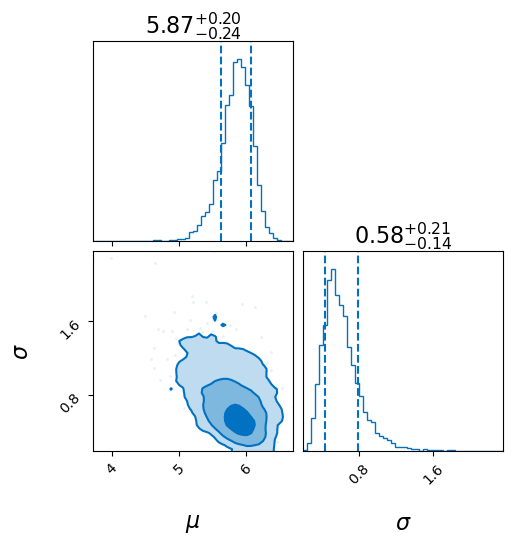

In [15]:
def hyper_prior_lognorm(dataset, s_mu, s_sigma):
    return np.exp(- (np.log(dataset['mu']) - s_mu)**2 / (2 * s_sigma**2)) /\
        (2 * np.pi * s_sigma**2)**0.5/(dataset['mu'])
hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),
                 s_sigma=LogUniform(0.01, 10, 's_sigma', '$\sigma$') )

hyper_prior_lognorm=hyper_prior_lognorm
hp_likelihood_lognorm = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_lognorm,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_lognorm =hp_priors_lognorm

# And run sampler
result_lognorm = run_sampler(
    likelihood=hp_likelihood_lognorm, priors=hp_priors_lognorm, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_lognorm.plot_corner()

19:29 bilby INFO    : Running for label 'maxwell_hype_48222', output will be saved to 'hy_outdir'
19:29 bilby INFO    : Analysis priors:
19:29 bilby INFO    : sigma=Uniform(minimum=10, maximum=2500, name='sigma', latex_label='$\\sigma$', unit=None, boundary=None)
19:29 bilby INFO    : mlo=LogUniform(minimum=0.1, maximum=400, name='mlo', latex_label='$\\rm{v^{lo}}$', unit=None, boundary=None)
19:29 bilby INFO    : mup=Uniform(minimum=400, maximum=10000, name='mup', latex_label='$\\rm{v^{up}}$', unit=None, boundary=None)
19:29 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
19:29 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
19:29 bilby INFO    : Single likelihood evaluation took 4.950e-04 s
19:29 bilby INFO    : U

1it [00:00, ?it/s]

19:29 bilby INFO    : Written checkpoint file hy_outdir/maxwell_hype_48222_resume.pickle
19:29 bilby INFO    : Starting to close worker pool.
19:29 bilby INFO    : Finished closing worker pool.
19:29 bilby INFO    : Rejection sampling nested samples to obtain 4409 posterior samples
19:29 bilby INFO    : Sampling time: 0:00:25.389361
19:29 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


19:29 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:29 bilby INFO    : Summary of results:
nsamples: 4409
ln_noise_evidence:  0.000
ln_evidence: -131.938 +/-  0.049
ln_bayes_factor: -131.938 +/-  0.049



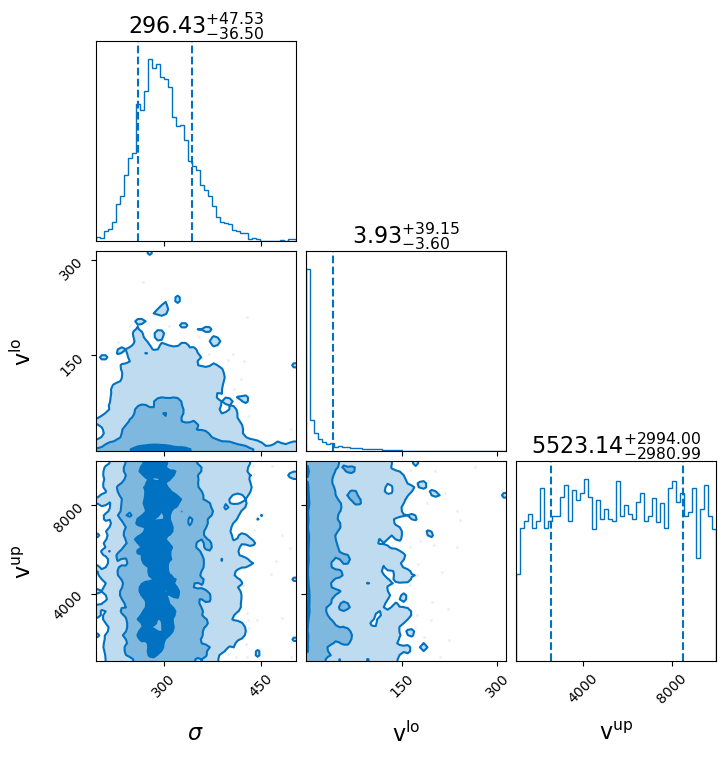

In [16]:
from scipy.stats import maxwell
from scipy.integrate import quad
def hyper_prior_maxwell(dataset,mlo,mup,sigma):
    log_likelihood = ((dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) * maxwell.pdf(dataset['mu'],scale=sigma)
    return log_likelihood

hp_priors_maxwell = dict(sigma=Uniform(10, 2500, 'sigma', r'$\sigma$'),
                        mlo=LogUniform(0.1,400,'mlo', r'$\rm{v^{lo}}$'),
                        mup=Uniform(400,10000,'mup', r'$\rm{v^{up}}$')
                        )

hyper_prior_maxwell = hyper_prior_maxwell
hp_likelihood_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_maxwell = hp_priors_maxwell
result_maxwell = run_sampler(
    likelihood=hp_likelihood_maxwell, priors=hp_priors_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

result_maxwell.plot_corner()

19:30 bilby INFO    : Running for label 'double_maxwell_hype_63376', output will be saved to 'hy_outdir'
19:30 bilby INFO    : Analysis priors:
19:30 bilby INFO    : sigma1=Uniform(minimum=10, maximum=2500, name='sigma1', latex_label='$\\sigma_1$(km/s)', unit=None, boundary=None)
19:30 bilby INFO    : sigma2=Uniform(minimum=10, maximum=2500, name='sigma2', latex_label='$\\sigma_2$(km/s)', unit=None, boundary=None)
19:30 bilby INFO    : alpha=Uniform(minimum=0.01, maximum=0.99, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None)
19:30 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
19:30 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
19:30 bilby INFO    : Single likelihood evaluation took 9.562e-04 s
1

1it [00:00, ?it/s]

19:31 bilby INFO    : Written checkpoint file hy_outdir/double_maxwell_hype_63376_resume.pickle
19:31 bilby INFO    : Starting to close worker pool.
19:31 bilby INFO    : Finished closing worker pool.


19:31 bilby INFO    : Rejection sampling nested samples to obtain 6061 posterior samples
19:31 bilby INFO    : Sampling time: 0:00:56.173831
19:31 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:31 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:31 bilby INFO    : Summary of results:
nsamples: 6061
ln_noise_evidence:  0.000
ln_evidence: -131.695 +/-  0.054
ln_bayes_factor: -131.695 +/-  0.054



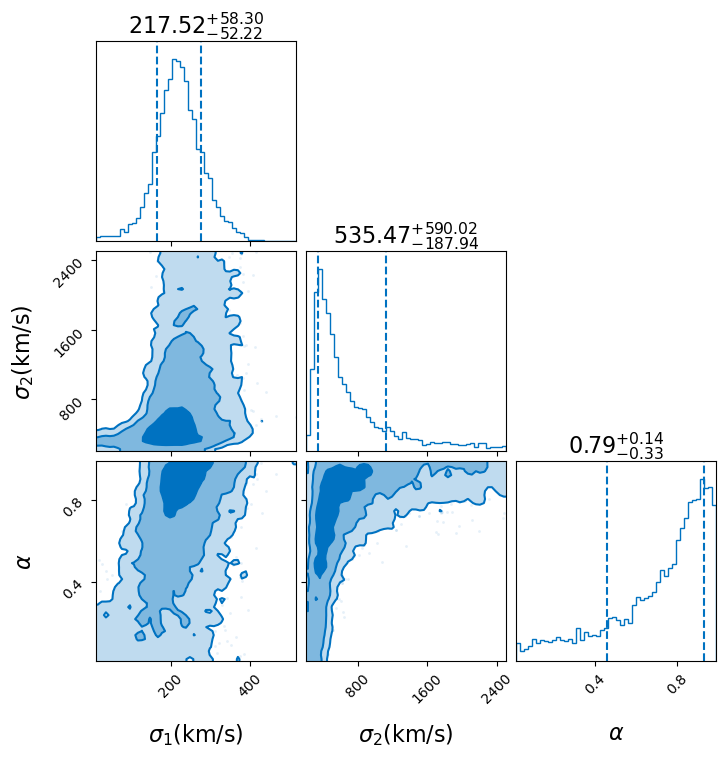

In [17]:
def hyper_prior_double_maxwell(dataset,sigma1, sigma2, alpha):
    mup=10000
    mlo=0.1
    # 数据范围限制
    sigma_constraint = (mlo < sigma1) & (sigma1 < sigma2) & (sigma2 < mup)
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    
    # Maxwell PDF for the two components
    pdf1 = maxwell.pdf(dataset['mu'], scale=sigma1)
    pdf2 = maxwell.pdf(dataset['mu'], scale=sigma2)
    # Combined mixture PDF
    mixture_pdf = alpha * pdf1 + (1 - alpha) * pdf2
    # Apply range restriction
    log_likelihood = sigma_constraint*valid_range * mixture_pdf
    return log_likelihood

hp_priors_double_maxwell = dict(
    sigma1=Uniform(10, 2500, 'sigma1', r'$\sigma_1$(km/s)'),
    sigma2=Uniform(10, 2500, 'sigma2', r'$\sigma_2$(km/s)'),
    alpha=Uniform(0.01, 0.99, 'alpha', r'$\alpha$')
)

hyper_prior_double_maxwell = hyper_prior_double_maxwell

hp_likelihood_double_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_double_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_double_maxwell = hp_priors_double_maxwell
# 运行采样器
result_2M = run_sampler(
    likelihood=hp_likelihood_double_maxwell, priors=hp_priors_double_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='double_maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_2M.plot_corner()

19:32 bilby INFO    : Running for label 'u_hype_27789', output will be saved to 'hy_outdir'
19:32 bilby INFO    : Analysis priors:
19:32 bilby INFO    : mlo=LogUniform(minimum=0.1, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
19:32 bilby INFO    : mup=Uniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
19:32 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
19:32 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
19:32 bilby INFO    : Single likelihood evaluation took 1.426e-04 s
19:32 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interv

1it [00:00, ?it/s]

19:33 bilby INFO    : Written checkpoint file hy_outdir/u_hype_27789_resume.pickle
19:33 bilby INFO    : Starting to close worker pool.
19:33 bilby INFO    : Finished closing worker pool.


19:33 bilby INFO    : Rejection sampling nested samples to obtain 7378 posterior samples
19:33 bilby INFO    : Sampling time: 0:00:21.262052
19:33 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:33 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:33 bilby INFO    : Summary of results:
nsamples: 7378
ln_noise_evidence:  0.000
ln_evidence: -131.459 +/-  0.048
ln_bayes_factor: -131.459 +/-  0.048



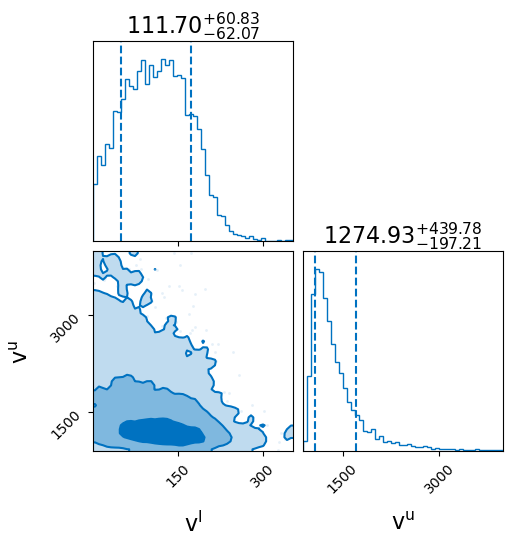

In [18]:
def hyper_prior_logu(dataset,mlo,mup):
    return (( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))/( dataset['mu'] * np.log(mup / mlo) )

hp_priors_logu = dict(mlo=LogUniform(0.1, 400, 'mlo',r'$\rm{v^l}$'),
                mup=Uniform(400, 4000, 'mup',r'$\rm{v^u}$'))
#end log-uniform

hyper_prior_logu=hyper_prior_logu

hp_likelihood_logu = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_logu,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_logu =hp_priors_logu

# And run sampler
result_logu = run_sampler(
    likelihood=hp_likelihood_logu, priors=hp_priors_logu, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_logu.plot_corner()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1326888/3417182276.py:8: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),
/tmp/ipykernel_1326888/3417182276.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))
19:34 bilby INFO    : Running for label 'u_hype_7432', output will be saved to 'hy_outdir'
19:34 bilby INFO    : Analysis priors:
19:34 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
19:34 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
19:34 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
19:34 bilby INFO    : A

1it [00:00, ?it/s]

19:35 bilby INFO    : Written checkpoint file hy_outdir/u_hype_7432_resume.pickle
19:35 bilby INFO    : Starting to close worker pool.
19:35 bilby INFO    : Finished closing worker pool.


19:35 bilby INFO    : Rejection sampling nested samples to obtain 4663 posterior samples
19:35 bilby INFO    : Sampling time: 0:00:23.471584
19:35 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:35 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:35 bilby INFO    : Summary of results:
nsamples: 4663
ln_noise_evidence:  0.000
ln_evidence: -132.316 +/-  0.053
ln_bayes_factor: -132.316 +/-  0.053



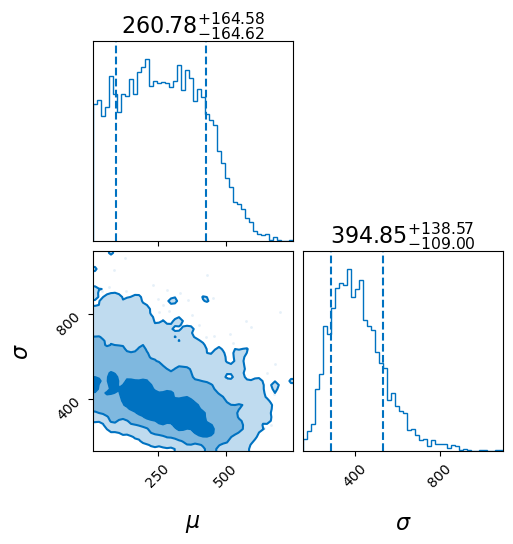

In [19]:
#begin Gaussian model with fixed upper and lower mass
def hyper_prior_G_fixed_max_min(dataset, mu, sigma):
    mup=10000
    mlo=0.1
    normalisingTerm = 0.5 * ( erf((mu-mlo)/(np.sqrt(2) * sigma)) -  erf((mu-mup)/(np.sqrt(2) * sigma)) )
    return ( ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))*((mu>mlo)&(mu<mup)) * (np.exp(- (dataset['mu'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5) / normalisingTerm 
hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),
                 sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))
#end Gaussian with fixed upper and lower ma
#end Gaussian model 
hyper_prior_G=hyper_prior_G_fixed_max_min
hp_likelihood_G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_G =hp_priors_G_fixed_max_min

# And run sampler
result_G = run_sampler(
    likelihood=hp_likelihood_G, priors=hp_priors_G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_G.plot_corner()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1326888/2969782846.py:9: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),
/tmp/ipykernel_1326888/2969782846.py:10: SyntaxWarning: invalid escape sequence '\s'
  sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),
/tmp/ipykernel_1326888/2969782846.py:11: SyntaxWarning: invalid escape sequence '\m'
  mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),
/tmp/ipykernel_1326888/2969782846.py:12: SyntaxWarning: invalid escape sequence '\s'
  sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),
19:47 bilby INFO    : Running f

1it [00:00, ?it/s]

19:50 bilby INFO    : Written checkpoint file hy_outdir/u_hype_8500_resume.pickle
19:50 bilby INFO    : Starting to close worker pool.
19:50 bilby INFO    : Finished closing worker pool.


19:50 bilby INFO    : Rejection sampling nested samples to obtain 6380 posterior samples
19:50 bilby INFO    : Sampling time: 0:02:55.269379
19:50 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:50 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:50 bilby INFO    : Summary of results:
nsamples: 6380
ln_noise_evidence:  0.000
ln_evidence: -133.155 +/-  0.058
ln_bayes_factor: -133.155 +/-  0.058



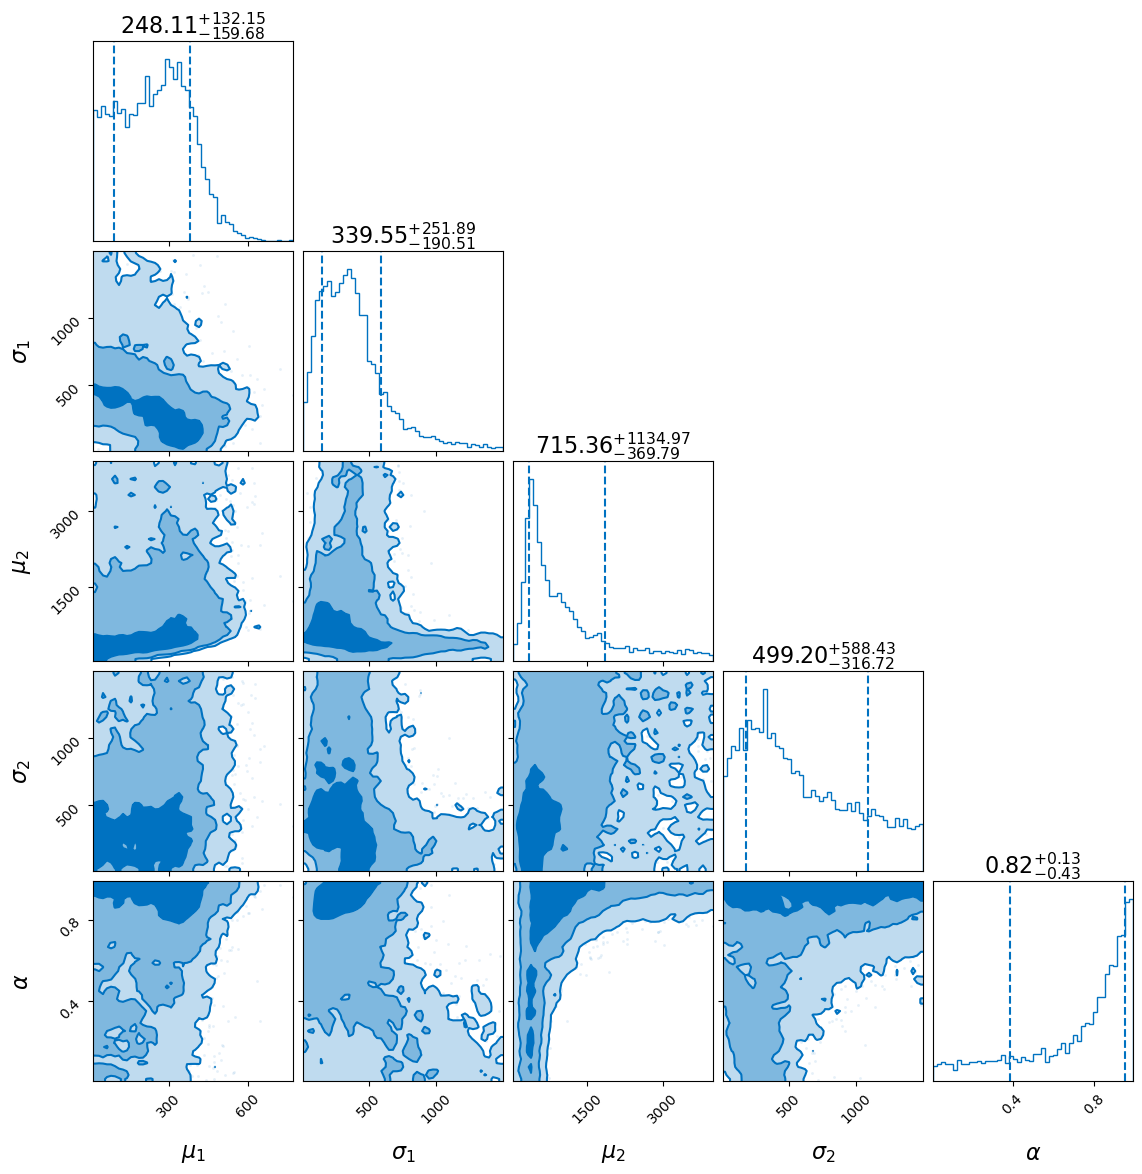

In [20]:
def hyper_prior_2G_fixed_max_min(dataset, mu1, sigma1,mu2,sigma2,alpha):
    mup=10000
    mlo=0.1
    normalisingTerm1 = 0.5 * ( erf((mu1-mlo)/(np.sqrt(2) * sigma1)) -  erf((mu1-mup)/(np.sqrt(2) * sigma1)) )
    normalisingTerm2 = 0.5 * ( erf((mu2-mlo)/(np.sqrt(2) * sigma2)) -  erf((mu2-mup)/(np.sqrt(2) * sigma2)) )
    return ((mu2 < mup ) & (mu1 > mlo) & (mu1 < mu2)  & ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) *\
        ( (( alpha*(np.exp(- (dataset['mu'] - mu1)**2 / (2 * sigma1**2)) /(2 * np.pi * sigma1**2)**0.5)) /normalisingTerm1) +\
        (1-alpha)*( ((np.exp(- (dataset['mu'] - mu2)**2 / (2 * sigma2**2)) /(2 * np.pi * sigma2**2)**0.5) ) / normalisingTerm2) )
hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),
                 sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),
                mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),
                sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),
                alpha=Uniform(0.01, 0.99, 'alpha', '$\\alpha$'))
#end two-Gausssian model with fixed lower and upper mass
 
hyper_prior_2G=hyper_prior_2G_fixed_max_min
hp_likelihood_2G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_2G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_2G =hp_priors_2G_fixed_max_min

# And run sampler
result_2G = run_sampler(
    likelihood=hp_likelihood_2G, priors=hp_priors_2G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_2G.plot_corner()

19:51 bilby INFO    : Running for label 'u_hype_63268', output will be saved to 'hy_outdir'
19:51 bilby INFO    : Analysis priors:
19:51 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='mlo', latex_label='$\\rm{\\mu}$', unit=None, boundary=None)
19:51 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='sigma', latex_label='$\\rm{\\sigma}$', unit=None, boundary=None)
19:51 bilby INFO    : nu=LogUniform(minimum=0.01, maximum=100, name='nu', latex_label='$\\rm{\\nu}$', unit=None, boundary=None)
19:51 bilby INFO    : tau=LogUniform(minimum=2.01, maximum=30, name='tau', latex_label='$\\rm{\\tau}$', unit=None, boundary=None)
19:51 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
19:51 bilby INFO    : Analysis likelihood noise evidence: 0
19:51 bilby INFO    : Single likelihood evaluation took 3.070e-04 s
19:51 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'period

1it [00:00, ?it/s]

19:55 bilby INFO    : Written checkpoint file hy_outdir/u_hype_63268_resume.pickle
19:55 bilby INFO    : Starting to close worker pool.
19:55 bilby INFO    : Finished closing worker pool.


19:55 bilby INFO    : Rejection sampling nested samples to obtain 6258 posterior samples
19:55 bilby INFO    : Sampling time: 0:03:49.871090
19:55 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:55 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
19:55 bilby INFO    : Summary of results:
nsamples: 6258
ln_noise_evidence:  0.000
ln_evidence: -133.157 +/-  0.065
ln_bayes_factor: -133.157 +/-  0.065



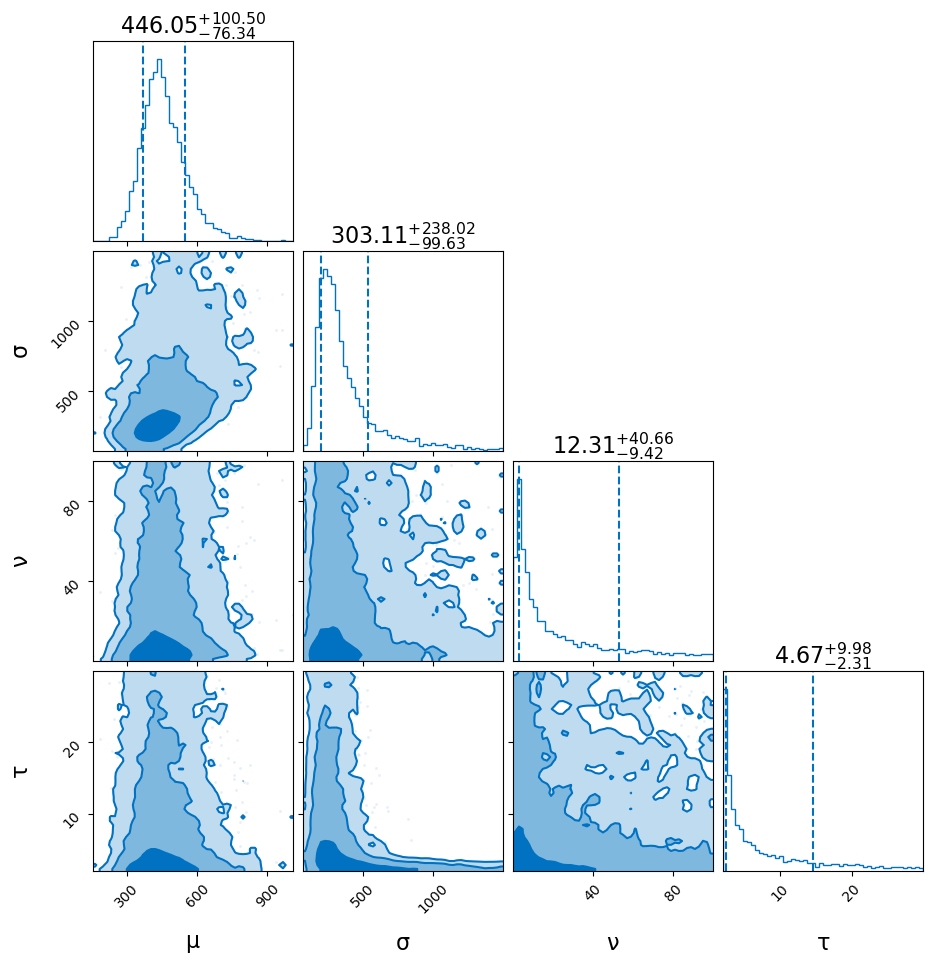

In [21]:
#begin SST
from scipy.special import beta
def hyper_prior_sst(dataset, mu,sigma,nu,tau):
        c = 2 * nu * ((1 + nu ** 2) *
                                beta(0.5, tau / 2) *
                                tau ** 0.5) ** -1
        m = ((2 * tau ** 0.5) * (nu - nu ** -1)) / (
                (tau - 1) * beta(0.5, 0.5 * tau))
        s2 = ((tau / (tau - 2)) * (
                nu ** 2 + nu ** -2 - 1) - m ** 2)
        mu_0 = mu - (sigma * m / np.sqrt(s2))
        sigma_0 = sigma / np.sqrt(s2)
        z = (dataset['mu'] - mu_0) / sigma_0
        p = np.where(dataset['mu'] < mu_0,
                     (c / sigma_0) * (1 + ((nu ** 2) * (z ** 2)) / tau) ** (
                             -(tau + 1) / 2),
                     (c / sigma_0) * (1 + (z ** 2) / ((nu ** 2) * tau)) ** (
                             -(tau + 1) / 2))
        return p

hp_priors_sst = dict(mu=Uniform(10, 4000, 'mlo',r'$\rm{\mu}$'),
                sigma=Uniform(10, 1500, 'sigma',r'$\rm{\sigma}$'),
                nu=LogUniform(0.01,100,'nu',r'$\rm{\nu}$'),
                tau=LogUniform(2.01,30,'tau',r'$\rm{\tau}$') )
#end SST

hyper_prior_sst=hyper_prior_sst
hp_likelihood_sst = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_sst,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_sst =hp_priors_sst

# And run sampler
result_sst = run_sampler(
    likelihood=hp_likelihood_sst, priors=hp_priors_sst, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_sst.plot_corner()

20:17 bilby INFO    : Running for label 'exponential_hype_32208', output will be saved to 'hy_outdir'
20:17 bilby INFO    : Analysis priors:
20:17 bilby INFO    : lam=LogUniform(minimum=0.0001, maximum=0.01, name='lam', latex_label='$\\lambda$', unit=None, boundary=None)
20:17 bilby INFO    : mlo=LogUniform(minimum=0.1, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
20:17 bilby INFO    : mup=LogUniform(minimum=400, maximum=10000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
20:17 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
20:17 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
20:17 bilby INFO    : Single likelihood evaluation took 3.544e-04 s
20:17 bilby INFO  

1it [00:00, ?it/s]

20:17 bilby INFO    : Written checkpoint file hy_outdir/exponential_hype_32208_resume.pickle
20:18 bilby INFO    : Starting to close worker pool.
20:18 bilby INFO    : Finished closing worker pool.


20:18 bilby INFO    : Rejection sampling nested samples to obtain 4748 posterior samples
20:18 bilby INFO    : Sampling time: 0:00:18.568389
20:18 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
20:18 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
20:18 bilby INFO    : Summary of results:
nsamples: 4748
ln_noise_evidence:  0.000
ln_evidence: -131.963 +/-  0.040
ln_bayes_factor: -131.963 +/-  0.040



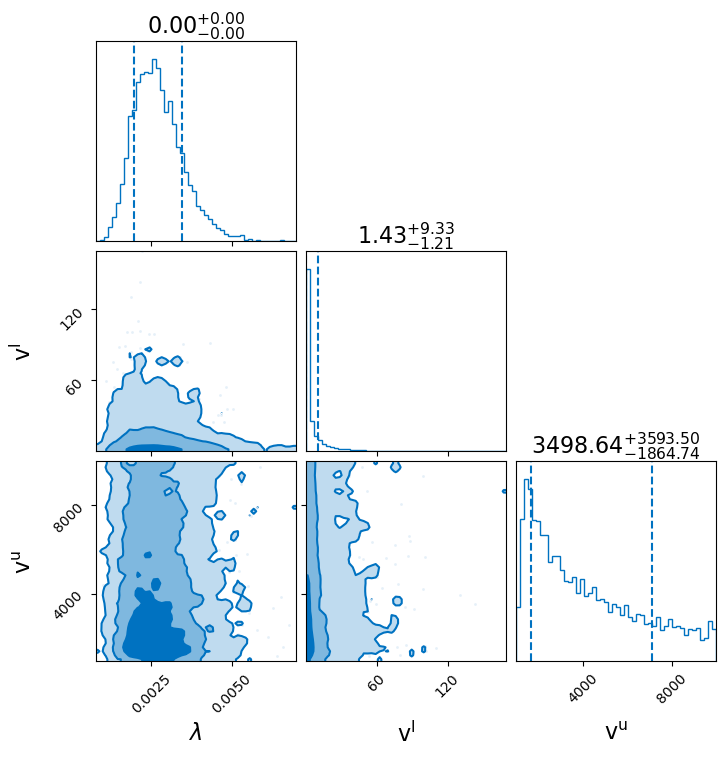

In [22]:
from scipy.stats import expon

def hyper_prior_exponential(dataset, mup, mlo, lam):
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    # Exponential PDF
    pdf_values = expon.pdf(dataset['mu'], scale=1/lam)
    # 限制范围外的概率为 0
    log_likelihood = valid_range * pdf_values
    return log_likelihood

hp_priors_exponential = dict(
    lam=LogUniform(0.0001, 0.01, 'lam', r'$\lambda$'),  # 速率参数范围
    mlo=LogUniform(0.1, 400, 'mlo', r'$\rm{v^l}$'),  # 下限范围
    mup=LogUniform(400, 10000, 'mup', r'$\rm{v^u}$')    # 上限范围
)

hyper_prior_exponential = hyper_prior_exponential

hp_likelihood_exponential = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_exponential,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_exponential = hp_priors_exponential

# 运行采样器
result_exponential = run_sampler(
    likelihood=hp_likelihood_exponential, priors=hp_priors_exponential, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='exponential_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_exponential.plot_corner()

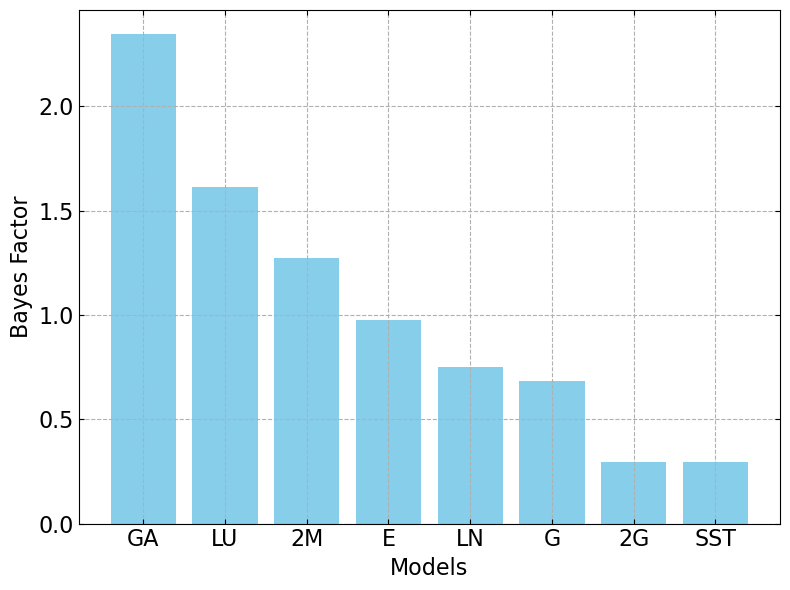

In [23]:
BF_gamma_maxwell=-131.086+131.938
BF_lognormal_maxwell=-132.227 +131.938
BF_loguniform_maxwell=-131.459+131.938
BF_gaussian_maxwell=-132.316+131.938
BF_double_gaussian_maxwell=-133.155+131.938
#BF_power_exponential=-158.387+161.920
BF_sst_maxwell=-133.157+131.938
BF_exponential_maxwell=-131.963+131.938
BF_double_maxwell_maxwell=-131.695+131.938
#------------------exp of BF----------------------
BF_gamma_maxwell_exp=np.exp(BF_gamma_maxwell)
BF_lognormal_maxwell_exp=np.exp(BF_lognormal_maxwell)
BF_loguniform_maxwell_exp=np.exp(BF_loguniform_maxwell)
BF_gaussian_maxwell_exp=np.exp(BF_gaussian_maxwell)
BF_double_gaussian_maxwell_exp=np.exp(BF_double_gaussian_maxwell)
#BF_power_exponential_exp=np.exp(BF_power_exponential)
BF_sst_maxwell_exp=np.exp(BF_sst_maxwell)
BF_exponential_maxwell_exp=np.exp(BF_exponential_maxwell)
BF_double_maxwell_maxwell_exp=np.exp(BF_double_maxwell_maxwell)
#-------------------------------------------------
from matplotlib.ticker import MultipleLocator,FuncFormatter
# Simplified labels for models
models = ["GA", "LN", "LU", "G", "2G", "SST","E","2M"]
'''
bayes_factors=[BF_gamma_exponential, BF_lognormal_exponential,BF_loguniform_exponential,
               BF_gaussian_exponential,BF_double_gaussian_exponential,
'''
bayes_factors=[BF_gamma_maxwell_exp, BF_lognormal_maxwell_exp,BF_loguniform_maxwell_exp,
               BF_gaussian_maxwell_exp,BF_double_gaussian_maxwell_exp,
               BF_sst_maxwell_exp,BF_exponential_maxwell_exp,BF_double_maxwell_maxwell_exp]
# 从大到小排序  
sorted_indices = np.argsort(bayes_factors)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_bayes_factors = [bayes_factors[i] for i in sorted_indices]

# 绘制柱状图
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xticks([-2,-1,0,1])
#ax.set_yticks([10**4,1.5*10**4,2*10**4,2.5*10**4])
plt.tick_params(top='on', right='on', which='both')
#ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(10000))
ax.tick_params(axis='both',which='both',direction='in',labelsize=16)
plt.bar(sorted_models, sorted_bayes_factors, color='skyblue',log=False)

plt.ylabel("Bayes Factor", fontsize=16)
plt.xlabel("Models", fontsize=16)
#plt.title("Bayes Factors Comparison", fontsize=14)
#plt.yscale('log')
plt.tight_layout()
#plt.yscale('log')
plt.grid(linestyle='--')
plt.savefig('Bayes_factors_comparison_noback_isotropy.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()